In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset heart.csv
df=pd.read_csv("heart.csv")
#to display first 5 records
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
#to check null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

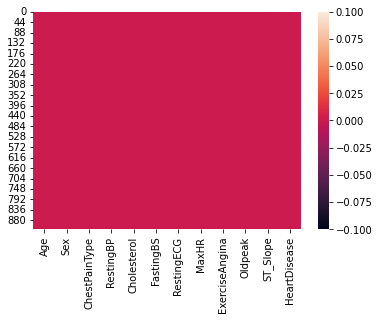

In [5]:
#visualize
sns.heatmap(df.isnull())
plt.show()

In [6]:
#to check datatypes
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
#to check duplicates
df.duplicated().sum()

0

In [8]:
#split dataset heart into 2 part
#first part hold all numeric type data
#second part hold all object type data
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [9]:
df_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [10]:
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [11]:
df_num.dtypes

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object

In [12]:
df_cat.dtypes

Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object

### using labelencoder to convert categorical data into mumerical data

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
columns=df_cat.columns
columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [15]:
for col in columns:
    #creating object of labelencoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [16]:
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


### now concatenate both cols

In [17]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2


In [18]:
df_new.duplicated().sum()

0

In [19]:
df_new.dtypes

Age                 int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
MaxHR               int64
Oldpeak           float64
HeartDisease        int64
Sex                 int32
ChestPainType       int32
RestingECG          int32
ExerciseAngina      int32
ST_Slope            int32
dtype: object

### selecting input & output

In [20]:
X=df_new.drop('HeartDisease',axis=1)
Y=df_new['HeartDisease']

In [21]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,1,1,1,0,2
1,49,160,180,0,156,1.0,0,2,1,0,1
2,37,130,283,0,98,0.0,1,1,2,0,2
3,48,138,214,0,108,1.5,0,0,1,1,1
4,54,150,195,0,122,0.0,1,2,1,0,2


In [22]:
Y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### standardising

In [25]:
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### creating function

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
def create_model(model):
    model.fit(X_train,Y_train)  #for training the model
    Y_pred=model.predict(X_test)  #for testing the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    

### perform logistics

In [28]:
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 96  13]
 [ 24 143]]


### perform decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       109
           1       0.84      0.71      0.77       167

    accuracy                           0.74       276
   macro avg       0.74      0.75      0.74       276
weighted avg       0.76      0.74      0.75       276

[[ 86  23]
 [ 48 119]]


### perform  decision tree with pruning technique

In [42]:
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)  #bydefault ginny index
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 96  13]
 [ 24 143]]


In [49]:
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')  #bydefault ginny index
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

[[ 97  12]
 [ 24 143]]


### perform decision tree using 2nd pruning technique

In [53]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45
##create object of DecisionTreeClassifier class
#leaf node means no child

#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)  #ginny index
#call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       109
           1       0.83      0.92      0.88       167

    accuracy                           0.84       276
   macro avg       0.84      0.82      0.83       276
weighted avg       0.84      0.84      0.84       276

[[ 78  31]
 [ 13 154]]


In [55]:
#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')  #entropy
#call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       109
           1       0.83      0.92      0.88       167

    accuracy                           0.84       276
   macro avg       0.84      0.82      0.83       276
weighted avg       0.84      0.84      0.84       276

[[ 78  31]
 [ 13 154]]


### ensambling technique:

### random forest

In [56]:
X.shape

(918, 11)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
#create  object of Random forest Tree 
for i in range(45,101,5):
    rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1)
    #bydefault gini
    #call the function
    print("NO of Dicision Tree : ",i)
    rfc=create_model(rfc)
    #here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

NO of Dicision Tree :  45
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       109
           1       0.89      0.81      0.85       167

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.83       276
weighted avg       0.84      0.83      0.83       276

[[ 93  16]
 [ 31 136]]
NO of Dicision Tree :  50
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       109
           1       0.89      0.80      0.84       167

    accuracy                           0.82       276
   macro avg       0.81      0.82      0.81       276
weighted avg       0.83      0.82      0.82       276

[[ 92  17]
 [ 33 134]]
NO of Dicision Tree :  55
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       109
           1       0.88      0.81      0.85       167

    accuracy                           0.82       276
   m

In [62]:
#create  object of Random forest Tree 
for i in range(45,101,5):
    rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1,criterion='entropy')
    #bydefault gini
    #call the function
    print("NO of Dicision Tree : ",i)
    rfc=create_model(rfc)
    #here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

NO of Dicision Tree :  45
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.90      0.87      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

[[ 92  17]
 [ 22 145]]
NO of Dicision Tree :  50
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       109
           1       0.89      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276

[[ 92  17]
 [ 23 144]]
NO of Dicision Tree :  55
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.90      0.87      0.88       167

    accuracy                           0.86       276
   m

### ADA boost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
#create object of Ada boostClassifier class
#for i in range(1,12):
ada=AdaBoostClassifier(random_state=1,n_estimators=9)
ada=create_model(ada)#call the function
#print("no of features : ",i)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       109
           1       0.92      0.81      0.86       167

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.86      0.84      0.85       276

[[ 97  12]
 [ 31 136]]


### gradient boost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
#CREATE THE OBJECT OF GRADIENT BOOST CLASSIFIER
#for i in range(1,101):
gbc=GradientBoostingClassifier(random_state=1,n_estimators=1)
    #call the function
gbc=create_model(gbc)
#print("no of n_estimators or DC :",i)
#n_estimators can be <=100
#algo use decision treeclassiifer

              precision    recall  f1-score   support

           0       0.90      0.57      0.70       109
           1       0.77      0.96      0.86       167

    accuracy                           0.80       276
   macro avg       0.84      0.76      0.78       276
weighted avg       0.82      0.80      0.79       276

[[ 62  47]
 [  7 160]]


### xgb gradient boost

### xtreme gradient boosting

In [77]:
#!pip install xgboost

In [78]:
from xgboost import XGBClassifier

In [81]:
#create obejct of class XGB classifier
#for i in range(1,101):
xgc=XGBClassifier(n_estimators=10,random_state=1,reg_alpha=1)
#automatic overfitiing : reg means regularisation and alpha or lambda:
#hyper parameter
#n_estimator<=100
#call the function
xgc=create_model(xgc)
#print("no of estimator : ", i)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.91      0.88      0.89       167

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

[[ 94  15]
 [ 20 147]]


### support vector machine (SVM)

In [82]:
from sklearn.svm import LinearSVC

In [83]:
#create object of LinearSVC Class
svc=LinearSVC(random_state=1)  #hard margin by default

In [84]:
#Call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.85      0.88       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 97  12]
 [ 25 142]]


### K-NN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
#create the object of Neighborsclassifier
#Create the object of KNeighborsClassifier  
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [87]:
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

[[ 95  14]
 [ 24 143]]


### Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
#create thr functiom
gnb=GaussianNB()

In [90]:
#call the function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       109
           1       0.90      0.83      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276

[[ 94  15]
 [ 29 138]]


### Conclusion